In [8]:
#Lab8_part2 (1)
import numpy as np
import matplotlib.pyplot as pl
import math
def J(w1,w2):#Given function
        j = (w1-10)**2 + (w2-10)**2
        return j
def gradJ(w1,w2):#gradient of the function
        grad = np.array([2*(w1-10),2*(w2-10)])
        return grad
class SGD:#steepest gradient descent
    def __init__(self,w_s,a,E1,E2):
        self.w_s1 = w_s[0]
        self.w_s2 = w_s[1]
        self.a = a
        self.E1 = E1
        self.E2 = E2
    def grad_des(self):#procedure
        self.w_1 = self.w_s1 - self.a*(gradJ(self.w_s1,self.w_s2)[0])
        self.w_2 = self.w_s2 - self.a*(gradJ(self.w_s1,self.w_s2)[1])
        self.grad_1 = gradJ(self.w_1,self.w_2)
        self.J1 = J(self.w_1,self.w_2)
        while np.linalg.norm(self.grad_1) >= self.E1:#stopping criteria 1
            self.w__1 = self.w_1 - self.a*(gradJ(self.w_1,self.w_2)[0])
            self.w__2 = self.w_2 - self.a*(gradJ(self.w_1,self.w_2)[1])
            #pl.scatter(self.w__1,self.w__2)(This command makes python kernel dead because it has to go through a large number of iterations.)
            if abs(np.dot(gradJ(self.w_1,self.w_2),gradJ(self.w__1,self.w__2))) < self.E2:#stopping criteria 2
                break
            self.w_1 = self.w__1
            self.w_2 = self.w__2
            self.grad_1 = gradJ(self.w_1,self.w_2)
            self.J1 = J(self.w_1,self.w_2)
        self.array = np.array([self.w_1,self.w_2])
        return self.array
     
    def minimum (self):#Finding minimum value for J
        min_J = J(self.w_1,self.w_2) 
        return min_J
w_s = np.array([2,5])
a = 0.001
E1 = 0.000001
E2 = 0.000001
c1 = SGD(w_s,a,E1,E2)
w = list(c1.grad_des())
print("Using constant alpha")
print(f"The value of (w1 and w2) for minimum value of J are {w} respectively.") 
J_min = c1.minimum()
print(f"The minimum value of the mulitvarible function thus obtained is {J_min} which is very close to actual minima i.e zero")
# w1 = np.arange(0,20,0.01)
# w2 = np.arange(0,20,0.01)
# W1,W2 = np.meshgrid(w1,w2)
# j2 = J(W1,W2)
# cp = pl.contour(W1,W2,j2)
# pl.clabel(cp,fontsize=8)
# pl.title('Contours Plot of J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2 ')
# pl.xlabel('W1 values')
# pl.ylabel('W2 values')
# pl.show()

Using constant alpha
The value of (w1 and w2) for minimum value of J are [9.999576267243476, 9.999735167027193] respectively.
The minimum value of the mulitvarible function thus obtained is 2.4968595243669365e-07 which is very close to actual minima i.e zero


The value of alpha found from line search is  0.49953125
The value of (w1 and w2) for minimum value of J are (9.9925, 9.9953125) respectively.
The minimum value of the mulitvarible function thus obtained is 7.822265624999759e-05 which is very close to actual minima i.e zero


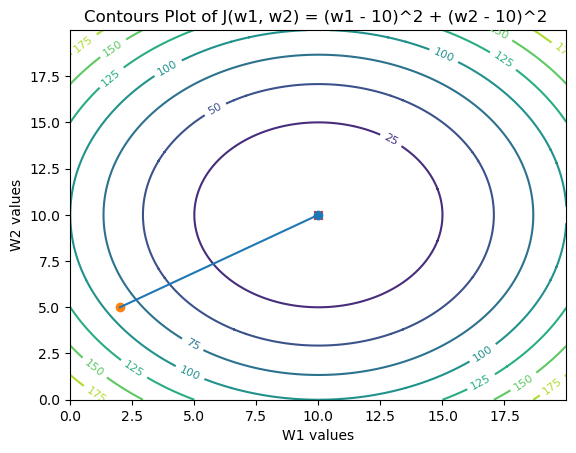

In [9]:
#Lab8 Part2(ii)
import numpy as np
import matplotlib.pyplot as pl
import math
def J(w1,w2):#Function
        j = (w1-10)**2+ (w2-10)**2
        return j
def gradJ(w1,w2):#Gradient of the function
        grad = np.array([2*(w1-10),2*(w2-10)])
        return grad
class unidirection_search():#line search
    def __init__(self,w_s,s):
        self.w_s = w_s
        self.s = s
    def u_s(self,a):
        w1 = self.w_s[0] + a*self.s[0]
        w2 = self.w_s[1] + a*self.s[1]
        j1 = J(w1,w2)
        return j1
    def critical(self,a,b,n):
        self.delta  = (b-a)/n
        self.a1 = a
        self.a2 = self.a1+self.delta
        self.a3 = self.a2+self.delta
        while self.a3<=b:
            if self.u_s(self.a1)>=self.u_s(self.a2)<=self.u_s(self.a3):
                self.tup1 = (self.a1,self.a3)
                return self.tup1
            else:
                self.a1 = self.a2
                self.a2 = self.a3
                self.a3 = self.a3 + self.delta
        a = (a+b)/2
        b = b+1
        n = 5
        crit_point = self.critical(a,b,n)
        return crit_point
    # Interval Halving method
    def interval_halving(self):
        self.E = 0.01
        self.a = self.tup1[0]
        self.b = self.tup1[1]
        self.L = self.b-self.a
        self.a_m = (self.a+self.b)/2
        while abs(self.L)>=self.E:
            self.Ja = self.u_s(self.a_m)
            self.a1 = self.a+self.L/4
            self.a2 = self.b-self.L/4
            self.Ja1 = self.u_s(self.a1)
            self.Ja2 = self.u_s(self.a2)
            if self.Ja1 < self.Ja:
                self.b = self.a_m
                self.a_m = self.a1
            elif self.Ja2 < self.Ja:
                self.a = self.a_m
                self.a_m = self.a2
            else:
                self.b = self.a2
                self.a = self.a1
                self.a_m = (self.a+self.b)/2
            self.L = self.b-self.a
        self.tup_3 = (self.a,self.b)
        return (self.tup_3[0]+self.tup_3[1])/2
class steepest_gradient():#steepest gradient descent
    def __init__(self,w_s,E1,E2):#w_s is the starting point and s is the direction vector (in this case it will be -grad(J))
        self.w_s = w_s
        self.E1 = E1
        self.E2 = E2
    def grad_des(self,a,b,n):#gradient descent procedure
        
        c = unidirection_search(self.w_s,-1*gradJ(self.w_s[0],self.w_s[1]))#Finding correct alpha using linear search
        range_1 = c.critical(a,b,n)
        self.a = c.interval_halving() 
        print("The value of alpha found from line search is ",self.a)
        self.w_1 = self.w_s[0] - self.a*(gradJ(self.w_s[0],self.w_s[1])[0])
        self.w_2 = self.w_s[1] - self.a*(gradJ(self.w_s[0],self.w_s[1])[1])
        pl.scatter(self.w_1,self.w_2,color='r',marker = 'x')
        self.array = (self.w_1,self.w_2)
        self.grad_1 = gradJ(self.w_1,self.w_2)
        self.J1 = J(self.w_1,self.w_2)
        while np.linalg.norm(self.grad_1) > self.E1:#stopping criteria
            c = unidirection_search(self.array,-1*self.grad_1)
            range_1 = c.critical(a,b,n)
            self.a = c.interval_halving() 
            self.w__1 = self.w_1 - self.a*(gradJ(self.w_1,self.w_2)[0])
            self.w__2 = self.w_2 - self.a*(gradJ(self.w_1,self.w_2)[1])
            pl.scatter(self.w__1,self.w__2)
            if abs(np.dot(gradJ(self.w_1,self.w_2),gradJ(self.w__1,self.w__2))) < self.E2:#stopping criteria
                  break
            self.w_1 = self.w__1
            self.w_2 = self.w__2
            self.grad_1 = gradJ(self.w_1,self.w_2)
            self.J1 = J(self.w_1,self.w_2)
        self.array = np.array([self.w_1,self.w_2])
        return self.array
     
    def minimum(self):
        min_J = J(self.w_1,self.w_2) 
        return min_J
w_s = np.array([2,5])
a = 0
b = 0.1#put b>=1 to get the perfect value of 0 as minimum
n = 5
E1 = 0.000001
E2 = 0.000001
c1 = steepest_gradient(w_s,E1,E2)
w = tuple(c1.grad_des(a,b,n))
print(f"The value of (w1 and w2) for minimum value of J are {w} respectively.") 
J_min = c1.minimum()
print(f"The minimum value of the mulitvarible function thus obtained is {J_min} which is very close to actual minima i.e zero")
w1 = np.arange(0,20,0.01)
w2 = np.arange(0,20,0.01)
W1,W2 = np.meshgrid(w1,w2)
j2 = J(W1,W2)
cp = pl.contour(W1,W2,j2)
pl.clabel(cp,fontsize=8)
pl.title('Contours Plot of J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2 ')
pl.xlabel('W1 values')
pl.ylabel('W2 values')
pl.scatter(w_s[0],w_s[1])
x = [w_s[0],w[0]]
y = [w_s[1],w[1]]
pl.plot(x,y)
pl.show()
#Note that there is an intermediate point on the line but it is so close to minima that it is not visible